In [1]:
import numpy as np
import pandas as pd
from hmmlearn import hmm
from datetime import datetime as dt
import matplotlib.pyplot as plt

In [2]:
# Read data
df = pd.read_csv("sp500_data.csv", index_col="Date")
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-01-03,1248.290039,1270.219971,1245.739990,1268.800049,1268.800049,2554570000
2006-01-04,1268.800049,1275.369995,1267.739990,1273.459961,1273.459961,2515330000
2006-01-05,1273.459961,1276.910034,1270.300049,1273.479980,1273.479980,2433340000
2006-01-06,1273.479980,1286.089966,1273.479980,1285.449951,1285.449951,2446560000
2006-01-09,1285.449951,1290.780029,1284.819946,1290.150024,1290.150024,2301490000


In [3]:
# Test if 'df' contains NaN values
nan_values = df.isna()
nan_count_per_column = df.isna().sum()
print(nan_count_per_column)

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [4]:
trend = df > df.shift(1)
trend.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-01-03,False,False,False,False,False,False
2006-01-04,True,True,True,True,True,False
2006-01-05,True,True,True,True,True,False
2006-01-06,True,True,True,True,True,True
2006-01-09,True,True,True,True,True,False


In [11]:
# Calculate returns
ret = np.log(df/df.shift(1)).dropna()
ret.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-01-04,0.016297,0.004046,0.017506,0.003666,0.003666,-0.015480
2006-01-05,0.003666,0.001207,0.002017,0.000016,0.000016,-0.033139
2006-01-06,0.000016,0.007163,0.002500,0.009356,0.009356,0.005418
2006-01-09,0.009356,0.003640,0.008865,0.003650,0.003650,-0.061126
2006-01-10,0.003650,-0.000488,-0.000825,-0.000357,-0.000357,0.030632


In [6]:
# Set random seed
np.random.seed(42)

# Train the GHMM model
close = ret.loc[:, 'Close'].values.reshape(-1, 1)
ghmm = hmm.GaussianHMM(n_components=3, covariance_type='full').fit(close)

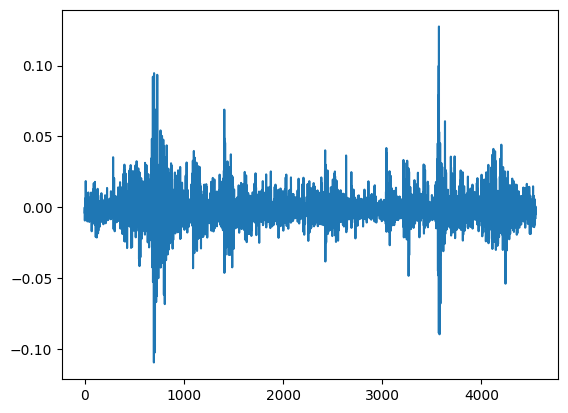

In [7]:
plt.plot(close)

In [8]:
# Obtain the expectation of multivariate-normal distribution for each state
static = 0
bull = 0
bear = 0

mu_n = ghmm.means_[0]
mu_c = ghmm.means_[1]
mu_3 = ghmm.means_[2]
print(mu_n, mu_c, mu_3)

[-0.00056305] [-0.00109946] [0.00171081]


In [9]:
print(ghmm.covars_[0])
print(ghmm.covars_[1])
print(ghmm.covars_[2])


[[7.04731522e-05]]
[[5.20156249e-05]]
[[0.00053967]]


In [10]:
np.round(ghmm.transmat_, 4)

array([[0.0016, 0.9984, 0.    ],
       [0.9656, 0.0149, 0.0195],
       [0.0281, 0.0089, 0.963 ]])